In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from helper_functions import linear_model_summary

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# This is not good practice, but is appropriate here for a beginners class.
# This allows us to not fuss with image sizes later in the presentation.
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

# A Short Introduction to Data Science

**Data Science** is the practice of asking and answering questions using data.  It is a cross disciplinary pursuit combining skill in:

  - Data Analysis.
  - Statistics.
  - Programming and Software Development.
  - Mathematics.
  
![](wills-twitter-quote.png)


A data scientist must at a minimum have the two skills:

  1. Can use data to generate interesting questions.
  2. Can use data to answer those interesting questions.
  
Today we will be looking at a simple dataset, and use it to ask and answer some interesting questions.

## Objectives for Today

  - Gain exposure to the some standard tools of the Data Scientist working in python:
    - Pandas
    - Matplotlib
    - Statsmodels
  - Discuss some basic visualizations of data, and how they lead to questions and answers:
    - Histograms
    - Scatterplots
    - Colored Scatterplots
  - Use a Linear Model to address some questions in a simple data set.

## Loading and Inspecting the Data

Our example of regression will use a dataset about various specimens of single species of insect collected across two continents.  The data was acquired from this question on CrossValidated, a statistics/data science question and answer site:

[Multiple regression, full and restricted model](http://stats.stackexchange.com/q/267034/74500)

We will be interested in explaining how the insects wing span varies, as influenced by the other measurements in our dataset.

![](dragonfly.jpg)

We'd like to load the `insects` data into python.  Our first step is to take a quick look at the raw data.

In [2]:
!head ./insects.csv

continent	latitude	wingsize	sex
1	35.5	901	0
1	37	896	0
1	38.6	906	0
1	40.7	907	0
1	40.9	898	0
1	42.4	893	0
1	45	913	0
1	46.8	915	0
1	48.8	927	0


`head` is actually a small command line program that displays the first 10 lines of a file.  We're using it here to inform our strategy for reading the data into python.

It looks like there are four columns in our dataset:

```
continent, latitude, wingsize, and sex
```

Each data element is separated from the next by a tab character, this type of format is often called "tab separated data".  Tab separated data can be read into python using the `read_csv` function in the `pandas` library.

In [3]:
insects = pd.read_csv('./insects.csv', sep='\t')

Now we have the data in a python object:

In [4]:
insects

,continent,latitude,wingsize,sex
0,1,35.5,901,0
1,1,37.0,896,0
2,1,38.6,906,0
3,1,40.7,907,0
4,1,40.9,898,0
5,1,42.4,893,0
6,1,45.0,913,0
7,1,46.8,915,0
8,1,48.8,927,0
9,1,49.8,924,0


We've got our four columns `continent, latitude, wingsize, and sex`.  

We can see some short descriptions of their qualities using `info`:

In [5]:
insects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
continent    42 non-null int64
latitude     42 non-null float64
wingsize     42 non-null int64
sex          42 non-null int64
dtypes: float64(1), int64(3)
memory usage: 1.4 KB


## Exploratory Visualizations

It is always a good idea to start making visualizations when confronted with a new set of data.  

### Histograms

We can get a first feel for how the quantities in our data are spread out using **histograms**:

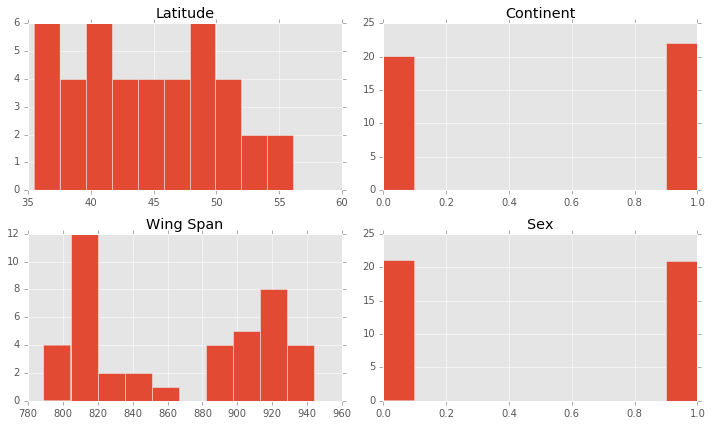

In [6]:
column_names = {
    "continent": "Continent",
    "latitude": "Latitude",
    "wingsize": "Wing Span",
    "sex": "Sex"
}

fig, axs = plt.subplots(2, 2)
for ax, (column, name) in zip(axs.flatten(), column_names.iteritems()):
    ax.hist(insects[column])
    ax.set_title(name)

fig.tight_layout()

Some observations:

  - `continent` and `sex` take only two values.  There are two continents represented in the data, labeled zero and one, and there are two sexes (probably Male and Female), also labeled zero and one.
  
These zero/one columns are called **binary** or **indicator variables**, they measure a specific yes/no condition.

  - The values of `wingspan` cluster into two distinct groups.  This is very interesting, and worthy of investigation.

### Scatterplots

Histograms are useful, but limited, as they do not reveal anything about the *relationships between the columns in our data*.  To rectify this we turn to uncountably the most effective and flexible visualization, the **scatterplot**.

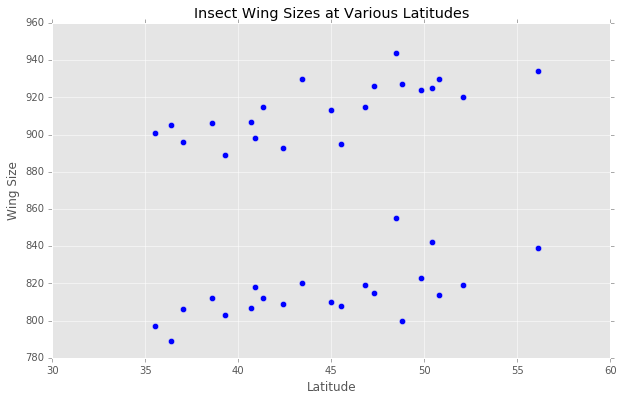

In [7]:
fig, ax = plt.subplots()

ax.scatter(insects.latitude, insects.wingsize, s=40)
ax.set_xlabel("Latitude")
ax.set_ylabel("Wing Size")
ax.set_title("Insect Wing Sizes at Various Latitudes")

Here we have a scatterplot of `wingsize` against `latitude`.

**Discussion:** What patterns do you see in the scatterplot.  Can you form any hypothesis about the data?

Here are some thoughts:
    
  - The most prominent feature of this data is the two bands.  There seem to be two very well defined elongated clusters of data, with the average wingsize in one cluster much greater than in the other.
  - Within each cluster there is noticeable tendency for wingsize to increase as latitude increases.

### Exploratory Data Analysis

This leads to a few questions we may wish to answer with the data.

  1. Are the two clusters associated with one of the other two variables in the dataset, continent or sex?
  2. Is the increase of wing size as latitude increases real or illusory?
  3. Does continent have any effect on wingsize?
  4. If the increase in wing size is real, does the *rate* of increase differ in the two clusters?
  
Let's answer each of these questions.

#### Are The Two Clusters Associated With Either Continent or Sex?

We can discover if the two clusters in the data are associated with either `continent` or `sex` through a well chosen visualization.  Let's make the same scatterplot from before, but color each point either red or blue, according to the value of `continent` or `sex`.

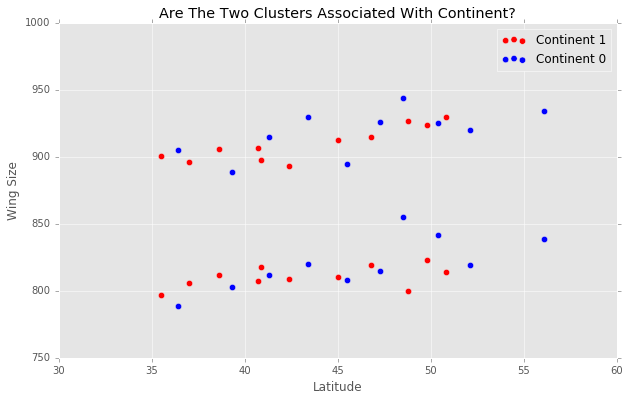

In [8]:
fig, ax = plt.subplots()

continent_boolean = insects.continent.astype(bool)
ax.scatter(insects.latitude[continent_boolean], 
           insects.wingsize[continent_boolean], 
           s=40, c="red", label="Continent 1")
ax.scatter(insects.latitude[~continent_boolean], 
           insects.wingsize[~continent_boolean],
           s=40, c="blue", label="Continent 0")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wing Size")
ax.set_title("Are The Two Clusters Associated With Continent?")
ax.legend()

The values of continent seem scattered randomly across the two clusters, so it does **not** seem like continent is associated with the clusters.

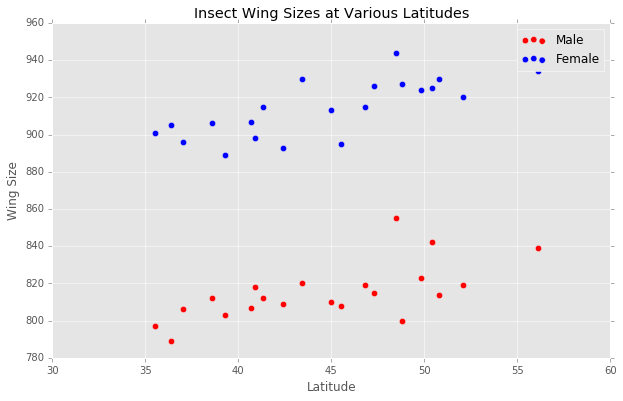

In [9]:
fig, ax = plt.subplots()

sex_boolean = insects.sex.astype(bool)
ax.scatter(insects.latitude[sex_boolean], 
           insects.wingsize[sex_boolean],
           s=40, c="red", label="Male")
ax.scatter(insects.latitude[~sex_boolean], 
           insects.wingsize[~sex_boolean],
           s=40, c="blue", label="Female")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wing Size")
ax.set_title("Insect Wing Sizes at Various Latitudes")
ax.legend()

There we go!

This is pretty definitive, the cluster of the larger insects are all female, and the cluster of smaller insects are all male.  This seems like enough evidence to conclude that the sex of the insect causes the data to cluster into two groups.

#### Is An Increasing Latitude Associated With an Increasing Wing Size?

This question is a little more sophisticated, and we need some new technology to answer it.

The idea is to create an equation:

$$ \text{Wing Span} \approx a + b \times \text{Latitude} $$

Then we can look at the number $b$, which tells us how we should expect `wingspan` to change as `latitude` changes.  If we find that $b > 0$, that's evidence that an increasing latitude is associated with an increasing wingspan.

I'll skip the technicalities, but the basic tool for creating equations like this is called **linear regression**.

In [10]:
linear_model = smf.ols(formula='wingsize ~ latitude', data=insects)
insects_model = linear_model.fit()
linear_model_summary(insects_model)

              Linear Model Summary             
Name         Parameter Estimate  Standard Error
-----------------------------------------------
Intercept                780.53           64.53
latitude                   1.88            1.44


The linear regression has attempted to estimate the equation we are after, and it has returned:

$$ \text{Wing Span} \approx 780.53 + 1.88 \times \text{Latitude} $$

So we can expect an on average increase of 1.88 wingspan for every increase in one latitude.

One way we can visualize this is to look at the equation as the equation for a line. If we *know* the latitude that we find an insect, we can *predict* the wing span using the equation.  If we plot the latitudes verses the predictions, we get a line.

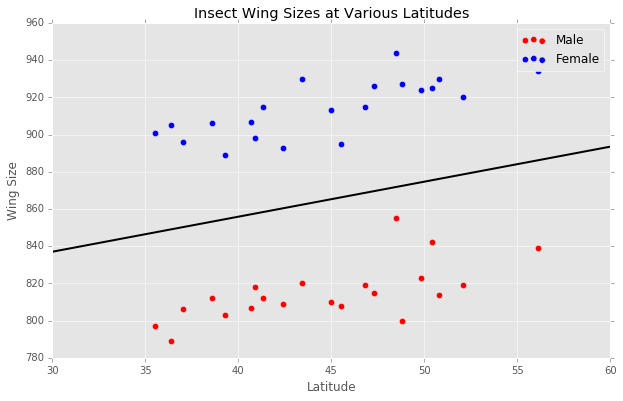

In [11]:
fig, ax = plt.subplots()

# Make a scatterplot of the data.
sex_boolean = insects.sex.astype(bool)
ax.scatter(insects.latitude[sex_boolean], 
           insects.wingsize[sex_boolean],
           s=40, c="red", label="Male")
ax.scatter(insects.latitude[~sex_boolean], 
           insects.wingsize[~sex_boolean],
           s=40, c="blue", label="Female")

# Make a linea graph of the predictions.
x = np.linspace(30, 60, num=250)
ax.plot(x, insects_model.params[0] + insects_model.params[1] * x,
       linewidth=2, c="black")

ax.set_xlim(30, 60)
ax.set_xlabel("Latitude")
ax.set_ylabel("Wing Size")
ax.set_title("Insect Wing Sizes at Various Latitudes")
ax.legend()

This plot elucidates a serious flaw in our model, it has no knowledge of the sex of the insect, so its predictions bisect the two clusters in the data.

It would much better to take account of the sex of the index and fit two lines, we make one line of prediction of the wing size given the latitude for males, and another for females.

The easiest way to do this is to modify our equation:

$$ \text{Wing Span} \approx a + b \times \text{Latitude} + c \times \text{Sex} $$

There is not another term: if the insect is male we *add $c$* to the prediction, otherwise we add nothing.

Again, linear regression can find an equation of this shape describing the data:

In [12]:
linear_model = smf.ols(formula='wingsize ~ latitude + sex', data=insects)
insects_model_with_sex = linear_model.fit()
linear_model_summary(insects_model_with_sex)

              Linear Model Summary             
Name         Parameter Estimate  Standard Error
-----------------------------------------------
Intercept                829.96           13.94
latitude                   1.88            0.31
sex                      -98.86            3.43


We now have an estimate for the number $c$ of $-98.86$.  This means, that on average, being male costs an insect about $-98.86$ in wingspan.

The predictions from this model now depend on whether an insect is male or female.  We have two lines of predictions, and the sex of the insect chooses which line to use:

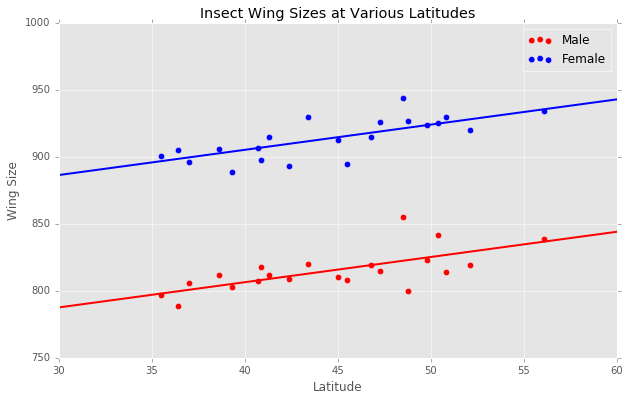

In [13]:
fig, ax = plt.subplots()

# Make a scatterplot of the data.
sex_boolean = insects.sex.astype(bool)
ax.scatter(insects.latitude[sex_boolean], 
           insects.wingsize[sex_boolean],
           s=40, c="red", label="Male")
ax.scatter(insects.latitude[~sex_boolean], 
           insects.wingsize[~sex_boolean],
           s=40, c="blue", label="Female")

# Make a linea graph of the predictions.
x = np.linspace(30, 60, num=250)
ax.plot(x, insects_model_with_sex.params[0] + insects_model_with_sex.params[1] * x,
       linewidth=2, c="blue")
ax.plot(x, insects_model_with_sex.params[0] + insects_model_with_sex.params[1] * x + insects_model_with_sex.params[2],
       linewidth=2, c="red")

ax.set_xlim(30, 60)
ax.set_xlabel("Latitude")
ax.set_ylabel("Wing Size")
ax.set_title("Insect Wing Sizes at Various Latitudes")
ax.legend()

#### Does Continent Have Any Effect on Wing Size?

Now that we have a model that seems to fit the data, we can use it as a jumping off point to answer other questions about the data.

First, let's see if continent has any effect on wing size.  To accomplish this, we need to modify our model from this:

$$ \text{Wing Span} \approx a + b \times \text{Latitude} + c \times \text{Sex} $$

to the slightly more complicated

$$ \text{Wing Span} \approx a + b \times \text{Latitude} + c \times \text{Sex} + d \times \text{Continent} $$

Then the new number $d$ captures the effect of the insect being found on the continent labeled $1$.  If $d$ is zero, or close to zero, then continent has no effect on wing span.

Let's estimate the model:

In [14]:
linear_model = smf.ols(formula='wingsize ~ latitude + sex + continent', data=insects)
insects_model_full = linear_model.fit()
linear_model_summary(insects_model_full)

              Linear Model Summary             
Name         Parameter Estimate  Standard Error
-----------------------------------------------
Intercept                836.16           14.84
latitude                   1.79            0.32
sex                      -98.86            3.41
continent                 -4.13            3.52


The continent estimate is **not** zero.

On the other hand, look at the **Standard Error** column.  This number is a rough measure of how certain the model is in its estimate of a parameter, the larger, the more uncertain.

A common (though not always appropriate) rule of thumb is that if the parameter estimate divided by the standard error is between -2 and 2, then the variable is called **insignificant**.

In [15]:
insects_model_full.params[3] / insects_model_full.bse[3]

-1.1721742732074607

So the continent parameter is insignificant.  This is often interpreted as "having no effect".

#### Is The Effect of Latitude Different for Males vs. Females?

Above we have drawn a separate line for each cluster, but these lines are restricted to have the **same slope**.  It's possible that this is not a correct description of the data, we may want the slope to be different for males and females.

A model like this contains an **interaction**, and the shape of the equation we want to create is

$$ \text{Wing Span} \approx a + b \times \text{Latitude} + c \times \text{Sex} + d \times \text{Sex} \times \text{Latitude} $$

The final part of this model

$$ d \times \text{Sex} \times \text{Latitude} $$

is called an interaction term, it allows us to change the slope of the latitude line based on the sex of the insect.

We can plot both of these lines to inspect if the difference of slopes in noticeable.

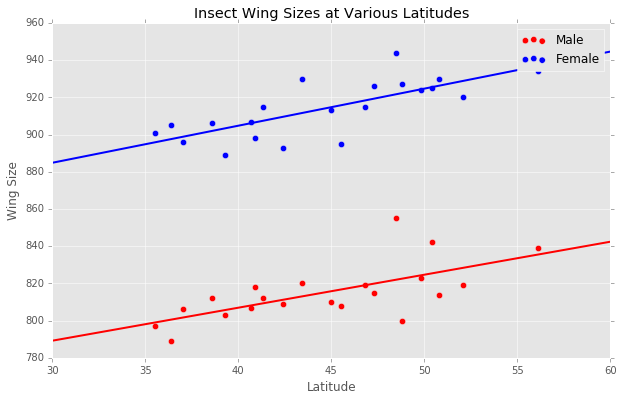

In [17]:
fig, ax = plt.subplots()

# Make a scatterplot of the data.
sex_boolean = insects.sex.astype(bool)
ax.scatter(insects.latitude[sex_boolean], 
           insects.wingsize[sex_boolean],
           s=40, c="red", label="Male")
ax.scatter(insects.latitude[~sex_boolean], 
           insects.wingsize[~sex_boolean],
           s=40, c="blue", label="Female")

# Make a linea graph of the predictions.
model_params = insects_model_with_interaction.params
x = np.linspace(30, 60, num=250)
ax.plot(x, model_params[0] + model_params[1] * x,
       linewidth=2, c="blue")
ax.plot(x, model_params[0] + model_params[1] * x + model_params[2] + model_params[3] * x,
       linewidth=2, c="red")

ax.set_xlim(30, 60)
ax.set_xlabel("Latitude")
ax.set_ylabel("Wing Size")
ax.set_title("Insect Wing Sizes at Various Latitudes")
ax.legend()

These two lines have different slopes, but the change is almost imperceptible.

To investigate a bit more, we can look at the parameter estimates from the model.

In [16]:
linear_model = smf.ols(formula='wingsize ~ latitude + sex + sex*latitude', data=insects)
insects_model_with_interaction = linear_model.fit()
linear_model_summary(insects_model_with_interaction)

              Linear Model Summary             
Name         Parameter Estimate  Standard Error
-----------------------------------------------
Intercept                825.08           19.78
latitude                   1.99            0.44
sex                      -89.10           27.98
sex:latitude              -0.22            0.62


The `sex:latitude` parameter is the $d$ from the equation above.  It encodes that the *difference* in slopes between males and females is $-0.22$.  A few observations:

  - This is tiny compared to the overall slope of $1.99$, so we have only made a small adjustment between the two clusters.
  - The estimated standard error of the difference is $0.62$, much larger than the estimated difference.  This makes the difference *insignificant*.

Altogether, changing the slopes based on the sex of the insect seems pointless, so we should conclude that the relationship between latitude and wing span does not depend on the sex of the insect.